In [2]:

# Thêm thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [47]:
# định nghĩa hàm activation

# Hàm sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x)) 

# Đạo hàm hàm sigmoid
def sigmoid_derivative(x):
    return x*(1-x) 


In [66]:

class MyNeuralNetwork:
    def __init__(self, layers, X, y, y_predict=None, lr =0.1, num_iters=100):
        self.X = X
        self.y = y
        self.y_predict = y_predict
        self.lr = lr
        self.layers = layers
        self.num_iters = num_iters
        self.weight = []
        self.bias = []

          # Khởi tạo các tham số ở mỗi layer
        for i in range(0, len(layers)-1):
            _w = np.random.randn(layers[i], layers[i+1])
            _b = np.zeros((layers[i+1], 1))
            self.weight.append(_w/layers[i])
            self.bias.append(_b) 

    def forward(self, x):
        y_pred = [x] 
        next_layer = x
        # forward từ x cho đến layer cuối cùng
        for i in range(0, len(self.layers) - 1):
            next_layer = sigmoid(np.dot(next_layer, self.weight[i]) + (self.bias[i].T))
            y_pred.append(next_layer)
        return y_pred
            
    def backward(self, x, y_true, y_pred):
        y_true = y_true.reshape(-1, 1)
        dA = [-(y_true/y_pred[-1] - (1-y_true)/(1-y_pred[-1]))]
        dW = []
        db = []
        # backward từ layer cuối cùng về ngược layer đầu tiên
        # chúng ta đang dùng activate function là hàm sigmoid   
        for i in reversed(range(0,len(self.layers)-1)): 
            _w = np.dot((y_pred[i]).T, dA[-1] * sigmoid_derivative(y_pred[i+1]))
            _b = (np.sum(dA[-1] * sigmoid_derivative(y_pred[i+1]), 0)).reshape(-1,1)
            _A = np.dot(dA[-1] * sigmoid_derivative(y_pred[i+1]), self.weight[i].T)
            
            
            dW.append(_w)
            db.append(_b)
            dA.append(_A)
        
        # Đảo ngược dW, db
        dW = dW[::-1]
        db = db[::-1] 
        
        return dW, db
    
    def fit_each_epoch(self, x, y):
        y_pred = self.forward(x)
        dW, db = self.backward(x, y, y_pred) 
        # print(dW,db)
        # Gradient descent
        for i in range(0, len(self.layers)-1):
            self.weight[i] = self.weight[i] - self.lr * dW[i]
            self.bias[i] = self.bias[i] - self.lr * db[i]

    def train(self, epochs=20, verbose=10):
        for epoch in range(0, epochs):
            self.fit_each_epoch(self.X, self.y)
            if epoch % verbose == 0:
                loss = self.calculate_loss(self.X, self.y)
                print("Epoch {}, loss {}".format(epoch, loss))
    
      
    # Dự đoán
    def predict(self, X):
        for i in range(0, len(self.layers) - 1):
            X = sigmoid(np.dot(X, self.weight[i]) + (self.bias[i].T))
        return X

    def draw(self):
        # t = 0.4
        y_predict = self.forward(X)[-1]
        plt.plot(y_predict)
        t = 0.5
#         print(self.weight)
#         plt.plot((4, 10),(-(self.weight[-1][0]+4*self.weight[-1][1]+ np.log(1/t-1))/self.weight[-1][2], -(self.weight[-1][0] + 10*self.weight[-1][1]+ np.log(1/t-1))/self.weight[-1][2]), 'g')
        plt.show() 

	# Tính loss function
    def calculate_loss(self, X, y):
        y_predict = self.predict(X)
        #return np.sum((y_predict-y)**2)/2
        return -(np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict))) 
      

In [67]:
# img = Image('Derative L:W.png')
# plt.figure(figsize=(10,5))
# plt.title("Derative L:W")
# plt.imshow(img) 

In [3]:
  
if __name__ == '__main__':
    # Dataset bài 2
    data = pd.read_csv('dataset.csv').values
    N, d = data.shape
    X = data[:, 0:d-1].reshape(-1, d-1)
    y = data[:, 2].reshape(-1, 1)  

In [69]:
p = MyNeuralNetwork(layers = [X.shape[1], 3, 8, 10, 2, 1], X = X, y= y, lr = 0.01, num_iters=10000)
p.train(30001, 10000)

Epoch 0, loss 19.319003075888517
Epoch 10000, loss 18.758051828001918
Epoch 20000, loss 0.08008891815818307
Epoch 30000, loss 0.022561293060204754


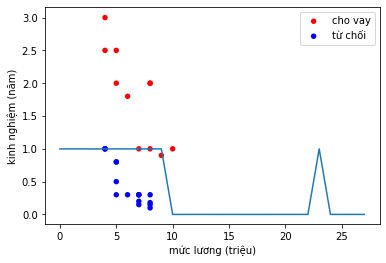

In [70]:
# Vẽ data bằng scatter
x_cho_vay = X[y[:,0]==1]
x_tu_choi = X[y[:,0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
p.draw()